# Various visualizations to determine how good the tracking is

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d
import pandas as pd
%load_ext autoreload
%autoreload 2

from DLC_for_WBFM.utils.feature_detection.utils_features import *
from DLC_for_WBFM.utils.feature_detection.utils_tracklets import *
from DLC_for_WBFM.utils.feature_detection.utils_detection import *
from DLC_for_WBFM.utils.feature_detection.visualization_tracks import *
from DLC_for_WBFM.utils.feature_detection.feature_pipeline import *
from DLC_for_WBFM.utils.feature_detection.utils_affine import *
from DLC_for_WBFM.utils.feature_detection.class_reference_frame import PreprocessingSettings
import pickle

In [2]:
fname = 'clust_df_dat_prealigned.pickle'
with open(fname, 'rb') as f:
    clust_df = pickle.load(f)
    
fname = 'match_dat_prealigned.pickle'
with open(fname, 'rb') as f:
    all_matches, all_conf = pickle.load(f)

In [3]:
clust_df.columns

Index(['clust_ind', 'all_ind_local', 'all_ind_global', 'all_xyz', 'all_prob',
       'slice_ind', 'extended_this_slice', 'not_finished'],
      dtype='object')

In [4]:
#new_matches

# Basic track statistics

## Track length

In [20]:
all_len = clust_df['slice_ind'].apply(len)

Text(0.5, 1.0, 'Lengths of individual tracks (minimum=20)')

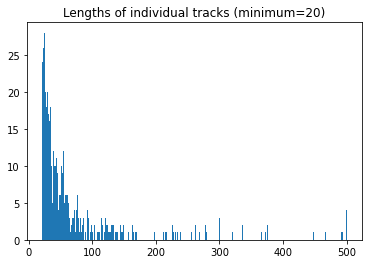

In [21]:
min_len = 20
num_frames = 500
bins = int((num_frames-min_len))
plt.hist(all_len[all_len>min_len], bins=bins);
plt.title(f"Lengths of individual tracks (minimum={min_len})")

## Matches per pair of frames

In [7]:
all_num_matches = [len(val) for k, val in all_matches.items()]

Text(0.5, 1.0, 'Number of matches between each frame')

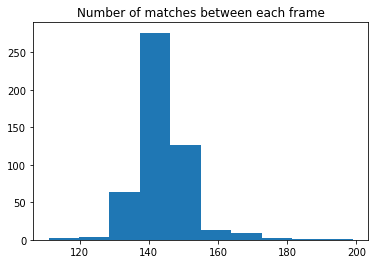

In [8]:
plt.hist(all_num_matches);
plt.title("Number of matches between each frame")

Text(0.5, 1.0, 'Number of matches between each frame')

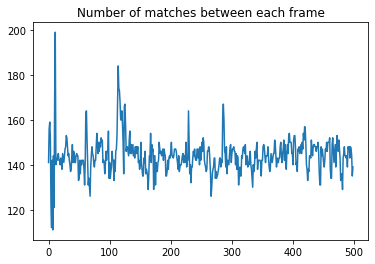

In [9]:
plt.plot(all_num_matches);
plt.title("Number of matches between each frame")

## Same data, but stitched

In [25]:
fname = 'clust_df_dat_prealigned-stitched.pickle'
with open(fname, 'rb') as f:
    clust_df2 = pickle.load(f)
    

In [28]:
all_len2 = clust_df2['slice_ind'].apply(len)

Text(0.5, 1.0, 'Lengths of individual tracks (minimum=20)')

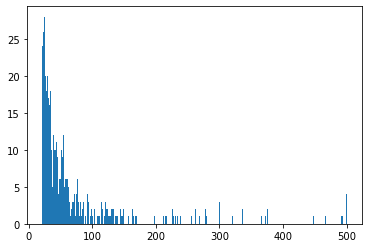

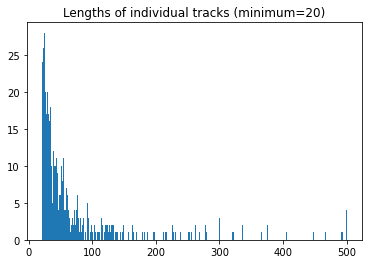

In [29]:
min_len = 20
num_frames = 500
bins = int((num_frames-min_len))
plt.hist(all_len[all_len>min_len], bins=bins);
plt.figure()
plt.hist(all_len2[all_len2>min_len], bins=bins);
plt.title(f"Lengths of individual tracks (minimum={min_len})")

## Older dataset

In [14]:
fname = 'clust_df_dat_minimax.pickle'
with open(fname, 'rb') as f:
    clust_df2 = pickle.load(f)
    
# fname = 'match_dat_nominimax.pickle'
# with open(fname, 'rb') as f:
#     all_matches2, all_conf2 = pickle.load(f)

In [15]:
all_len2 = clust_df2['slice_ind'].apply(len)

Text(0.5, 1.0, 'Lengths of individual tracks (minimum=20)')

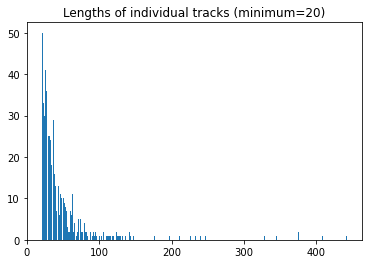

In [16]:
min_len = 20
num_frames = 500
bins = int((num_frames-min_len))
plt.hist(all_len2[all_len2>min_len], bins=bins);
plt.title(f"Lengths of individual tracks (minimum={min_len})")

In [37]:
# Fix a bug... accidentally overwrote the file
fname = 'clust_df_dat_prealigned.pickle'
with open(fname, 'wb') as f:
    pickle.dump(clust_df,f)